# What's new since last year's UGM?
## 2017 RDKit UGM Edition

Not an exhaustive list, just some examples.

- [Drawing improvements](#Drawing-Improvements)
- [R-Group Decomposition](#R-Group-Decomposition)
- [More 3D Descriptors](#More-3D-Descriptors)
- [Substructure Library](#Substructure-Library)


## KNIME Integration

- Initial support for KNIME's new (and still beta) streaming feature
- Support for Sereina's new conformation generation code (now used by default)
- RDKit Molecule Extractor node
- The usual bug fixes
- Development moved to github


## Drawing Improvements

In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole

**Reminder** molecules display as pictures in the jupyter notebook:

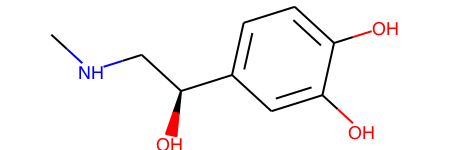

In [2]:
epinephrine = Chem.MolFromSmiles('CNC[C@H](O)c1ccc(O)c(O)c1')
epinephrine

You can display groups of molecules in a grid:

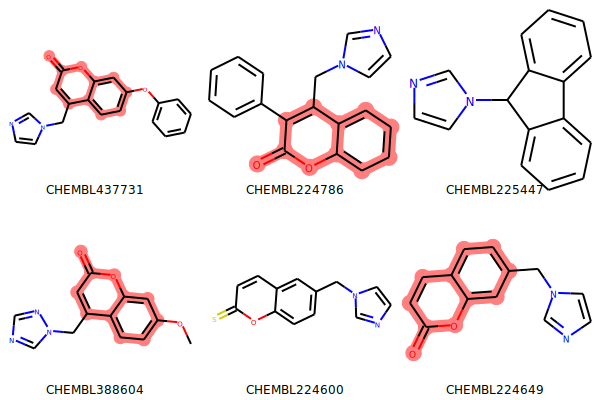

In [3]:
import pickle
d = pickle.load(open('./data/Target_no_65.pkl','rb'))  # this particular target is "Cytochrome P450 19A1 Homo sapiens"
entries = d[35328]
mols = [Chem.MolFromSmiles(y) for x,y in entries[:6]]
nms = [x for x,y in entries]
p = Chem.MolFromSmiles('O=c1oc2ccccc2cc1')
matches=[x.GetSubstructMatch(p) for x in mols]
Draw.MolsToGridImage(mols,highlightAtomLists=matches,legends=nms,useSVG=True)

You can easily display 3D molecules as 3D (*2017.09 release*):

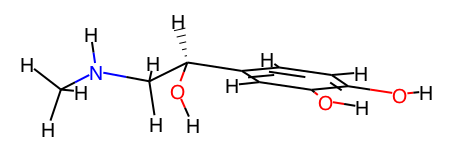

In [4]:
epi3 = Chem.AddHs(epinephrine)
AllChem.EmbedMolecule(epi3,AllChem.ETKDG())
IPythonConsole.ipython_3d = True
epi3

Now chemical reactions are also drawn nicely in the notebook (*2017.09 release*)

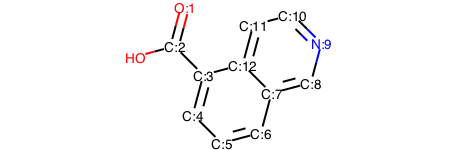

In [5]:
Chem.MolFromSmiles("[cH:5]1[cH:6][c:7]2[cH:8][n:9][cH:10][cH:11][c:12]2[c:3]([cH:4]1)[C:2](=[O:1])O")

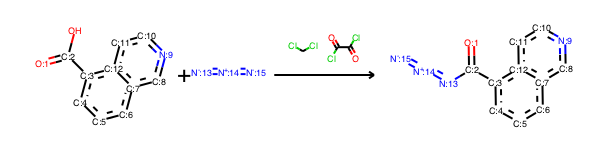

In [6]:
IPythonConsole.highlightByReactant=False
sma= "[cH:5]1[cH:6][c:7]2[cH:8][n:9][cH:10][cH:11][c:12]2[c:3]([cH:4]1)[C:2]"+\
        "(=[O:1])O.[N-:13]=[N+:14]=[N-:15]>C(Cl)Cl.C(=O)(C(=O)Cl)Cl>[cH:5]1["+\
        "cH:6][c:7]2[cH:8][n:9][cH:10][cH:11][c:12]2[c:3]([cH:4]1)[C:2](=[O:1])"+\
        "[N:13]=[N+:14]=[N-:15]"
rxn = AllChem.ReactionFromSmarts(sma,useSmiles=True)
rxn

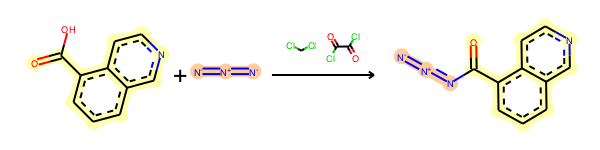

In [7]:
IPythonConsole.highlightByReactant=True
rxn

Directly calling the functions:

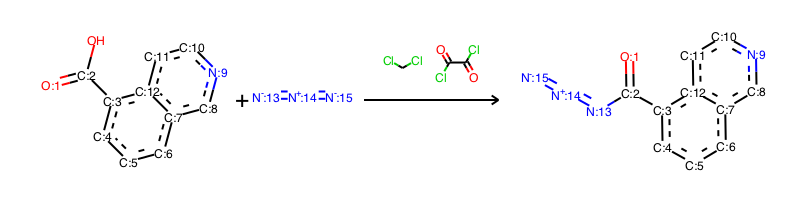

In [8]:
Draw.ReactionToImage(rxn)

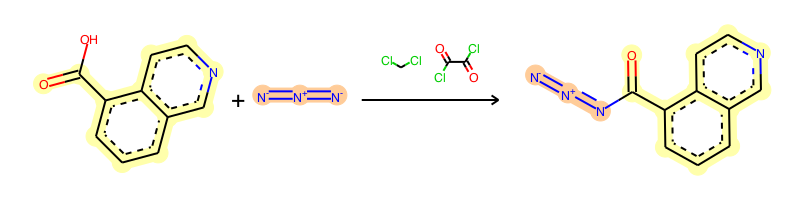

In [9]:
Draw.ReactionToImage(rxn,highlightByReactant=True)

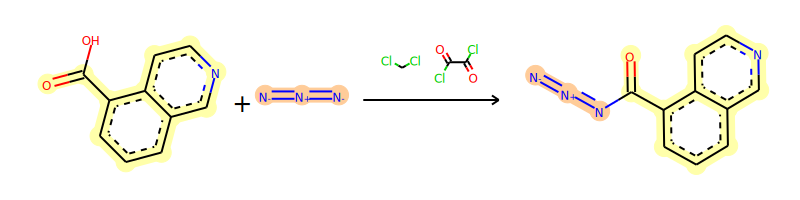

In [10]:
from IPython.display import SVG
SVG(Draw.ReactionToImage(rxn,highlightByReactant=True,useSVG=True))

## R-Group Decomposition

In [11]:
from rdkit.Chem import rdRGroupDecomposition as rgd
import pandas as pd
from rdkit.Chem import PandasTools
PandasTools.InstallPandasTools()

/Users/glandrum/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: to-Python converter for std::vector<boost::shared_ptr<RDKit::ROMol>, std::allocator<boost::shared_ptr<RDKit::ROMol> > > already registered; second conversion method ignored.
  return f(*args, **kwds)


Start by getting a set of molecules that share a core.

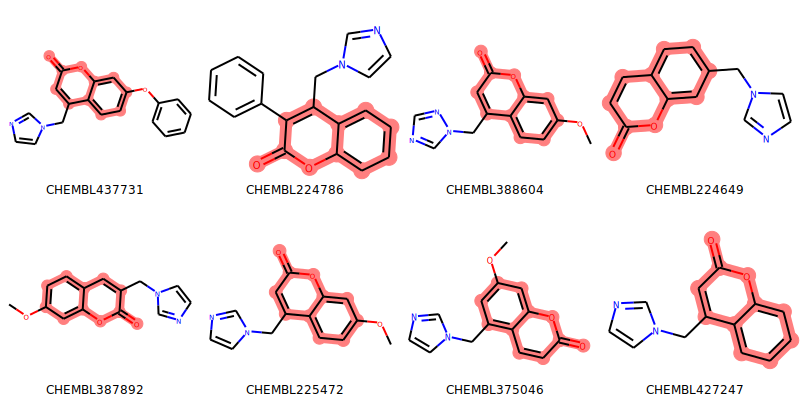

In [12]:
import pickle
d = pickle.load(open('./data/Target_no_65.pkl','rb'))  # this particular target is "Cytochrome P450 19A1 Homo sapiens"
entries = d[35328]
mols = [Chem.MolFromSmiles(y) for x,y in entries]
nms = [x for x,y in entries]
core = Chem.MolFromSmiles('O=c1oc2ccccc2cc1')
matching = [x for x,y in enumerate(mols) if y.HasSubstructMatch(core)]
mols = [mols[x] for x in matching]
nms = [nms[x] for x in matching]
matches=[x.GetSubstructMatch(core) for x in mols]
Draw.MolsToGridImage(mols[:8],molsPerRow=4,highlightAtomLists=matches[:8],legends=nms[:8],useSVG=True)

In [13]:
rg = rgd.RGroupDecomposition(core)
for mol in mols:
    rg.Add(mol)
rg.Process()

True

,AC50,ID,ROMol,assay_id,assay_organism,canonical_smiles,description,is_active,molregno,pAC50,pref_name,standard_flag,standard_relation,standard_type,standard_units
0,7943.28,778799,,737822,,Fc1cccc(c1)C(=O)N2CCC3(CCN(Cc4ccccc4)CC3)CC2,PUBCHEM_BIOASSAY: Cytochrome panel assay with activity outcomes. (Class of assay: other) Panel member name: p450-cyp2d6 Compounds with AC50 equal or less than 10 uM are considered active,active,778799,5.100000128334195,Cytochrome P450 2D6,1,=,AC50,nM
1,10000.0,878902,,737822,,CN(C)C(=O)c1ccc(cc1)c2ccc3ncnc(Nc4ccc(F)cc4)c3c2,PUBCHEM_BIOASSAY: Cytochrome panel assay with activity outcomes. (Class of assay: other) Panel member name: p450-cyp2d6 Compounds with AC50 equal or less than 10 uM are considered active,inactive,878902,5.0,Cytochrome P450 2D6,1,=,AC50,nM
2,22387.21,766975,,737822,,CCCCn1nc2cc(ccc2c1OCC)C(=O)NC3CCCc4ccccc34,PUBCHEM_BIOASSAY: Cytochrome panel assay with activity outcomes. (Class of assay: other) Panel member name: p450-cyp2d6 Compounds with AC50 equal or less than 10 uM are considered active,inactive,766975,4.65000002688118,Cytochrome P450 2D6,1,=,AC50,nM
3,15848.93,882987,,737822,,CCOc1c2ccc(cc2nn1CCOC)C(=O)NCc3ccc4OCOc4c3,PUBCHEM_BIOASSAY: Cytochrome panel assay with activity outcomes. (Class of assay: other) Panel member name: p450-cyp2d6 Compounds with AC50 equal or less than 10 uM are considered active,inactive,882987,4.800000052738445,Cytochrome P450 2D6,1,=,AC50,nM
4,2238.72,761292,,737822,,COc1ccc(NC(=O)CSc2nc(C)c3CCCCc3c2C#N)cc1,PUBCHEM_BIOASSAY: Cytochrome panel assay with activity outcomes. (Class of assay: other) Panel member name: p450-cyp2d6 Compounds with AC50 equal or less than 10 uM are considered active,active,761292,5.650000220873455,Cytochrome P450 2D6,1,=,AC50,nM

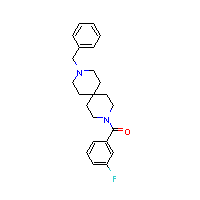
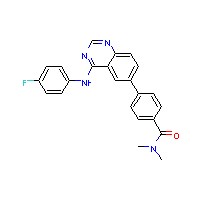
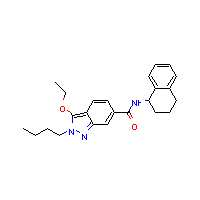
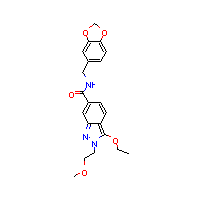
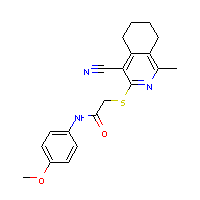

In [14]:
df = PandasTools.LoadSDF('data/chembl_cyps.head.sdf')
df.head()

In [15]:
frame = pd.DataFrame(rg.GetRGroupsAsColumns())

In [17]:
PandasTools.molRepresentation='svg'

frame.filter(['Core','R1','R2','R3'],axis=1).head()
#frame.head()

Core                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

**An aside:** it's not necessarily obvious here, but the `PandasTools` module has also been updated to use the new drawing code.

### Stereochemistry and R Group decomposition

Start with a ChEMBL dataset that has chirality:

Here's how we got the data, we won't repeat this here:
```
%load_ext sql
%config SqlMagic.feedback = False
data = %sql postgresql://localhost/chembl_23 \
          select molregno,m from rdk.mols join compound_records using (molregno) \
           where doc_id=93264 and m@>'c:1:[c;R1]:[c;R1]:c:c-2:c:1-C-[C;R1](-*)(-*)-C-C-2'::qmol ;
print(repr(data))
data.DataFrame().head()
```

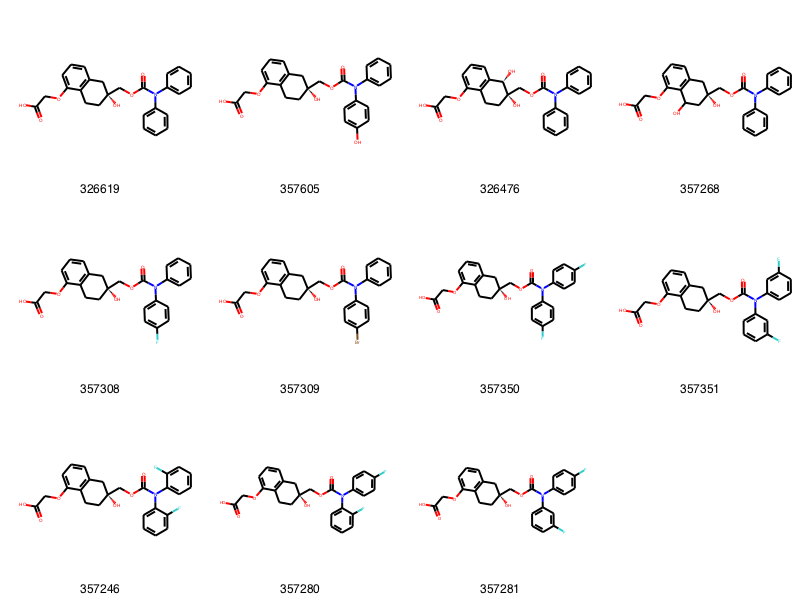

In [18]:
#data = [(1959798, 'CO[C@H]1C[C@@](CCN(C)CCCc2nc3ccccc3[nH]2)(OC(=O)C(C)C)[C@@H](C(C)C)c2ccc(F)cc21'), (1959799, 'CC(C)C(=O)O[C@]1(CCN(C)CCCc2nc3ccccc3[nH]2)C[C@@H](OCc2ccccc2)c2cc(F)ccc2[C@@H]1C(C)C'), (1959800, 'CC(C)C(=O)O[C@]1(CCN(C)CCCc2nc3ccccc3[nH]2)C[C@H](OCc2ccccc2)c2cc(F)ccc2[C@@H]1C(C)C'), (1959801, 'CC(C)C(=O)O[C@]1(CCN(C)CCCc2nc3ccccc3[nH]2)C[C@@H](O)c2cc(F)ccc2[C@@H]1C(C)C'), (1959802, 'CC(C)C(=O)O[C@]1(CCN(C)CCCc2nc3ccccc3[nH]2)C[C@H](O)c2cc(F)ccc2[C@@H]1C(C)C'), (72035, 'COCC(=O)O[C@]1(CCN(C)CCCc2nc3ccccc3[nH]2)CCc2cc(F)ccc2[C@@H]1C(C)C'), (1960689, 'CC(C)C(=O)O[C@]1(CCN(C)CCCc2nc3ccccc3[nH]2)CCc2cc(F)ccc2[C@@H]1C(C)C'), (1960690, 'COCC(=O)O[C@]1(CCN(C)CCCc2nc3ccccc3[nH]2)CC(C)(C)c2cc(F)ccc2[C@@H]1C(C)C'), (1960691, 'CCCC[C@@H]1C[C@@](CCN(C)CCCc2nc3ccccc3[nH]2)(OC(=O)COC)[C@@H](C(C)C)c2ccc(F)cc21'), (1960692, 'CO[C@@H]1C[C@@](CCN(C)CCCc2nc3ccccc3[nH]2)(OC(=O)C(C)C)[C@@H](C(C)C)c2ccc(F)cc21')]
data=[(326619, 'O=C(O)COc1cccc2c1CC[C@](O)(COC(=O)N(c1ccccc1)c1ccccc1)C2'), (357605, 'O=C(O)COc1cccc2c1CC[C@](O)(COC(=O)N(c1ccccc1)c1ccc(O)cc1)C2'), (326476, 'O=C(O)COc1cccc2c1CC[C@](O)(COC(=O)N(c1ccccc1)c1ccccc1)[C@H]2O'), (357268, 'O=C(O)COc1cccc2c1C(O)C[C@](O)(COC(=O)N(c1ccccc1)c1ccccc1)C2'), (357308, 'O=C(O)COc1cccc2c1CC[C@](O)(COC(=O)N(c1ccccc1)c1ccc(F)cc1)C2'), (357309, 'O=C(O)COc1cccc2c1CC[C@](O)(COC(=O)N(c1ccccc1)c1ccc(Br)cc1)C2'), (357350, 'O=C(O)COc1cccc2c1CC[C@](O)(COC(=O)N(c1ccc(F)cc1)c1ccc(F)cc1)C2'), (357351, 'O=C(O)COc1cccc2c1CC[C@](O)(COC(=O)N(c1cccc(F)c1)c1cccc(F)c1)C2'), (357246, 'O=C(O)COc1cccc2c1CC[C@](O)(COC(=O)N(c1ccccc1F)c1ccccc1F)C2'), (357280, 'O=C(O)COc1cccc2c1CC[C@](O)(COC(=O)N(c1ccc(F)cc1)c1ccccc1F)C2'), (357281, 'O=C(O)COc1cccc2c1CC[C@](O)(COC(=O)N(c1ccc(F)cc1)c1cccc(F)c1)C2')]
df = pd.DataFrame(data,columns=('molregno','m'))
df.head()
Draw.MolsToGridImage([Chem.MolFromSmiles(x) for x in df.m],molsPerRow=4,legends=[str(x) for x in df.molregno])

In [19]:
core = Chem.MolFromSmarts('c:1:c:c:c:c-2:c:1-C-[C@](-*)(-*)-C-C-2')
rgp = rgd.RGroupDecompositionParameters()
rgp.removeHydrogensPostMatch=True
rg = rgd.RGroupDecomposition(core,rgp)
for smi in df.m:
    rg.Add(Chem.MolFromSmiles(smi))
rg.Process()
frame = pd.DataFrame(rg.GetRGroupsAsColumns())
frame['molregno'] = [x for x,y in data]
frame.head()
frame.sort_values(['molregno']).filter(['molregno','Core','R2','R3']).head()

molregno                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [20]:
core = Chem.MolFromSmiles('c:1:c:c:c:c-2:c:1-C-[C@](-*)(-*)-C-C-2',
                          sanitize=False) # have to skip sanitization or the chirality will be removed
rgp = rgd.RGroupDecompositionParameters()
rgp.removeHydrogensPostMatch=True
rg = rgd.RGroupDecomposition(core,rgp)
for smi in df.m:
    rg.Add(Chem.MolFromSmiles(smi))
rg.Process()
frame = pd.DataFrame(rg.GetRGroupsAsColumns())
frame['molregno'] = [x for x,y in data]
frame.head()
frame.sort_values(['molregno']).filter(['molregno','Core','R2','R3']).head()

molregno                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

We can also get the results as SMILES with a one-liner:

In [21]:
rgd.RGroupDecompose([core],[Chem.MolFromSmiles(x) for x in df.m],asSmiles=True,options=rgp)

([{'Core': 'c1cc2c(c([*:5])c1)C([*:1])C[C@]([*:2])([*:3])C2[*:4]',
   'R1': '[H][*:1].[H][*:1]',
   'R2': 'O[*:2]',
   'R3': 'O=C(OC[*:3])N(c1ccccc1)c1ccccc1',
   'R4': '[H][*:4].[H][*:4]',
   'R5': 'O=C(O)CO[*:5]'},
  {'Core': 'c1cc2c(c([*:5])c1)C([*:1])C[C@]([*:2])([*:3])C2[*:4]',
   'R1': '[H][*:1].[H][*:1]',
   'R2': 'O[*:2]',
   'R3': 'O=C(OC[*:3])N(c1ccccc1)c1ccc(O)cc1',
   'R4': '[H][*:4].[H][*:4]',
   'R5': 'O=C(O)CO[*:5]'},
  {'Core': 'c1cc2c(c([*:5])c1)C([*:1])C[C@]([*:2])([*:3])C2[*:4]',
   'R1': '[H][*:1].[H][*:1]',
   'R2': 'O[*:2]',
   'R3': 'O=C(OC[*:3])N(c1ccccc1)c1ccccc1',
   'R4': 'O[*:4].[H][*:4]',
   'R5': 'O=C(O)CO[*:5]'},
  {'Core': 'c1cc2c(c([*:5])c1)C([*:1])C[C@]([*:2])([*:3])C2[*:4]',
   'R1': 'O[*:1].[H][*:1]',
   'R2': 'O[*:2]',
   'R3': 'O=C(OC[*:3])N(c1ccccc1)c1ccccc1',
   'R4': '[H][*:4].[H][*:4]',
   'R5': 'O=C(O)CO[*:5]'},
  {'Core': 'c1cc2c(c([*:5])c1)C([*:1])C[C@]([*:2])([*:3])C2[*:4]',
   'R1': '[H][*:1].[H][*:1]',
   'R2': 'O[*:2]',
   'R3': 'O=C(OC[

## More 3D Descriptors

**Note** In order to build the RDKit with the 3D descriptors enabled, you must have eigen3 installed. The RDKit binary distributions from conda do include the 3D descriptors.

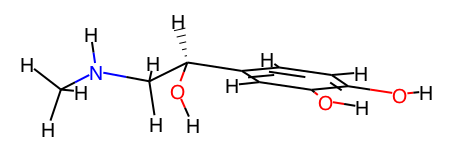

In [22]:
from rdkit.Chem import rdMolDescriptors
epi3

### Relatively new ones (2016.09 release)

In [23]:
print("PBF:",rdMolDescriptors.CalcPBF(epi3))
print("PMI:",rdMolDescriptors.CalcPMI1(epi3),rdMolDescriptors.CalcPMI2(epi3),rdMolDescriptors.CalcPMI3(epi3))
print("NPR:",rdMolDescriptors.CalcNPR1(epi3),rdMolDescriptors.CalcNPR2(epi3))
print("radius of gyration:",rdMolDescriptors.CalcRadiusOfGyration(epi3))
print("inertial shape factor",rdMolDescriptors.CalcInertialShapeFactor(epi3))
print("eccentricity",rdMolDescriptors.CalcEccentricity(epi3))
print("asphericity",rdMolDescriptors.CalcAsphericity(epi3))
print("spherocity index",rdMolDescriptors.CalcSpherocityIndex(epi3))
#print("",rdMolDescriptors.Calc(epi3))

PBF: 0.37769139547638236
PMI: 285.06910955685026 1307.6032488850358 1559.1107164971297
NPR: 0.18284083775481833 0.8386853063410671
radius of gyration: 2.932865386512526
inertial shape factor 0.0029420420460316873
eccentricity 0.9831425268236117
asphericity 0.5500476229493733
spherocity index 0.09622335098851609


In [24]:
linear = Chem.AddHs(Chem.MolFromSmiles('C#CC#CC#C'))
AllChem.EmbedMolecule(linear,AllChem.ETKDG())
planar = Chem.AddHs(Chem.MolFromSmiles('c1ccccc1'))
AllChem.EmbedMolecule(planar,AllChem.ETKDG())
spherical = Chem.AddHs(Chem.MolFromSmiles('c12c3c4c5c1c6c7c8c2c9c1c3c2c3c4c4c%10c5c5c6c6c7c7c%11c8c9c8c9c1c2c1c2c3c4c3c4c%10c5c5c6c6c7c7c%11c8c8c9c1c1c2c3c2c4c5c6c3c7c8c1c23'))
AllChem.EmbedMolecule(spherical)
adamantane = Chem.AddHs(Chem.MolFromSmiles('C1C2CC3CC1CC(C2)C3'))
AllChem.EmbedMolecule(adamantane,AllChem.ETKDG());

In [25]:
descrs = ('PBF','PMI1','PMI2','PMI3','NPR1','NPR2','RadiusOfGyration','InertialShapeFactor',
          'Eccentricity','Asphericity','SpherocityIndex')
from collections import defaultdict
descrVals = defaultdict(list)
for mol in (linear,planar,spherical,adamantane):
    for descr in descrs:
        fn = getattr(rdMolDescriptors,'Calc%s'%descr)
        descrVals[descr].append(fn(mol))
nms = ['linear','planar','spherical','adamantane']
cols = [nms]+[descrVals[x] for x in descrs]
colns = ['name']+list(descrs)
import pandas as pd
df = pd.DataFrame(cols,colns)
df

,0,1,2,3
name,linear,planar,spherical,adamantane
PBF,0.00193711,8.93599e-06,1.75203,1.12889
PMI1,0.0117722,84.6321,5820.62,286.659
PMI2,396.731,89.9074,5822.25,287.638
PMI3,396.742,174.54,5823.88,292.475
NPR1,2.96722e-05,0.484888,0.99944,0.980113
NPR2,0.999973,0.515112,0.999721,0.983462
RadiusOfGyration,2.31418,1.4948,3.48117,1.78356
InertialShapeFactor,84.9436,0.00608648,0.000171755,0.00343078
Eccentricity,1,0.874576,0.0334524,0.198439


### The really new ones (Guillaume will say more about these later)

In [26]:
print("RDF:",len(rdMolDescriptors.CalcRDF(epi3)))
print("MORSE:",len(rdMolDescriptors.CalcMORSE(epi3)))
print("WHIM:",len(rdMolDescriptors.CalcWHIM(epi3)))
print("GETAWAY:",len(rdMolDescriptors.CalcGETAWAY(epi3)))
print("AUTOCORR3D:",len(rdMolDescriptors.CalcAUTOCORR3D(epi3)))


RDF: 210
MORSE: 224
WHIM: 114
GETAWAY: 273
AUTOCORR3D: 80


## Substructure Library

This is a data structure designed to be allow efficient substructure searches of sets of molecules. Searches, by default, use multiple threads. The `SubstructuLibrary` can use a fingerprint column to reduce the search space.

In [27]:
from rdkit.Chem import rdSubstructLibrary

We'll construct a `SubstructLibrary` that stores molecules as RDKit molecule and that uses the RDKit pattern fingerprint to filter searches. Storing the molecules as RDKit molecules isn't the most memory efficient way to do things, but it is yields the best runtime

In [28]:
sslib = rdSubstructLibrary.SubstructLibrary(rdSubstructLibrary.MolHolder(),rdSubstructLibrary.PatternHolder())
for m in Chem.ForwardSDMolSupplier('data/chembl_cyps.head.sdf'):
    if m is None:
        continue
    sslib.AddMol(m)

In [29]:
len(sslib)

1000

Here's how we search:

In [30]:
len(sslib.GetMatches(Chem.MolFromSmiles('c1ccncc1C')))

57

Get a sense of performance:

In [31]:
q = Chem.MolFromSmiles('c1ccncc1C')
%timeit sslib.GetMatches(q)

1.32 ms ± 70.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Compare that to a standard substructure search:

In [32]:
ms = [x for x in Chem.ForwardSDMolSupplier('data/chembl_cyps.head.sdf') if x is not None]
%timeit [x for x in ms if x.HasSubstructMatch(q)]
len([x for x in ms if x.HasSubstructMatch(q)])

32.4 ms ± 186 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


57

That performance difference is due to the use of the pattern fingerprint for substructure screening as well as the multi-threaded searching (though this is more likely to be relevant for larger datasets).

Let's try a larger dataset. Since this has about 40K compounds, we don't want to store the molecules themselves, we'll store SMILES for them instead. This is slower to search, but makes it practical to work with larger datasets:

In [33]:
sslib2 = rdSubstructLibrary.SubstructLibrary(rdSubstructLibrary.CachedSmilesMolHolder(),rdSubstructLibrary.PatternHolder())
for m in Chem.ForwardSDMolSupplier('data/chembl_cyps.head.sdf'):
    if m is None:
        continue
    sslib2.AddMol(m)

In [34]:
len(sslib2)

1000

In [35]:
q = Chem.MolFromSmiles('c1ccncc1C')
%timeit sslib2.GetMatches(q)

13.3 ms ± 366 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [36]:
import gzip
sslib2 = rdSubstructLibrary.SubstructLibrary(rdSubstructLibrary.CachedSmilesMolHolder(),rdSubstructLibrary.PatternHolder())
for m in Chem.ForwardSDMolSupplier(gzip.open('data/chembl_cyps.sdf.gz')):
    if m is None:
        continue
    sslib2.AddMol(m)

In [37]:
q = Chem.MolFromSmiles('c1ccncc1C')
%timeit sslib2.GetMatches(q)
len(sslib2.GetMatches(q))

202 ms ± 2.79 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


1000

In [38]:
%timeit sslib2.GetMatches(q,maxResults=2000)
len(sslib2.GetMatches(q,maxResults=2000))

415 ms ± 4.55 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


2000

In [39]:
q = Chem.MolFromSmiles('c1cc(C)ncc1C')
%timeit sslib2.GetMatches(q)
len(sslib2.GetMatches(q))

252 ms ± 12.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


527

In [40]:
q = Chem.MolFromSmiles('c1cc(O)ncc1C')
%timeit sslib2.GetMatches(q)
len(sslib2.GetMatches(q))

57.3 ms ± 842 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


43

## Initial version of stereochemistry enumeration

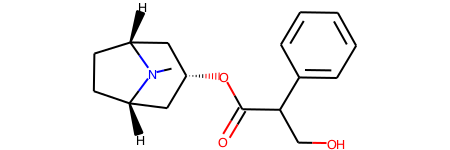

In [21]:
atropine = Chem.MolFromSmiles('CN1[C@@H]2CC[C@H]1C[C@H](C2)OC(=O)C(CO)c3ccccc3')
atropine

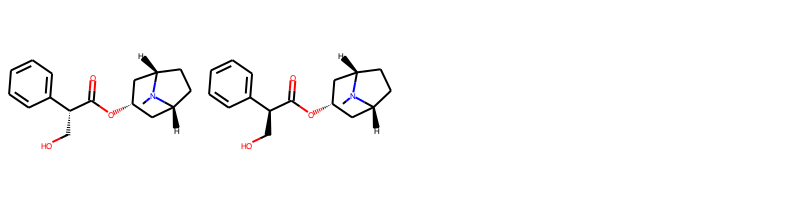

In [22]:
atropine_possible = AllChem.GenerateStereoisomers(atropine)
Draw.MolsToGridImage(list(atropine_possible),molsPerRow=4)

We only get two results here because the code by default only expands the stereochemistry at unspecified atomic centers. We can change that though:

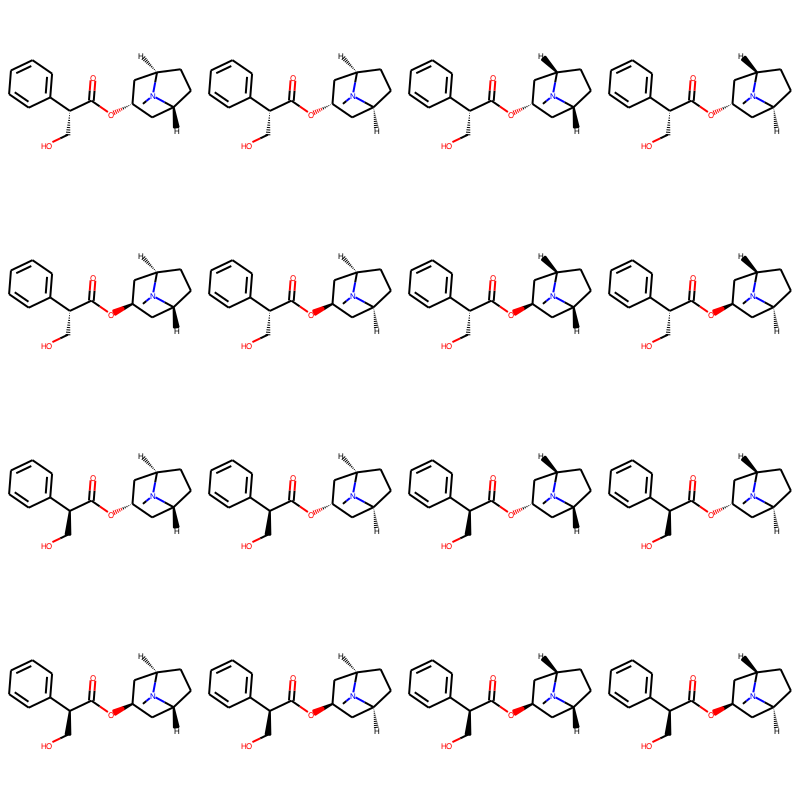

In [24]:
atropine_possible = AllChem.GenerateStereoisomers(atropine,AllChem.StereoEnumerationOptions(onlyUnassigned=False))
Draw.MolsToGridImage(list(atropine_possible),molsPerRow=4)

Now we get a bunch of stereoisomers, but many of them are non-physical. The new code has an option to attempt to answer the "is this reasonable or not?" question. It does this by trying to generate a 3D conformation for (*embed*) each stereoisomer; stereoisomers that won't embed are not returned. This certainly isn't a perfect strategy, and it can be quite time consuming, but I think it's better than nothing.

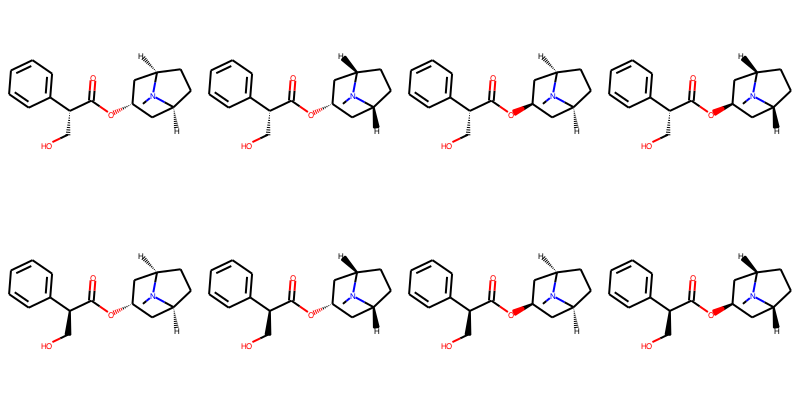

In [25]:
atropine_possible = AllChem.GenerateStereoisomers(atropine,AllChem.StereoEnumerationOptions(onlyUnassigned=False,
                                                                                     tryEmbedding=True))
Draw.MolsToGridImage(list(atropine_possible),molsPerRow=4)

Here's the same example for scopolamine. We won't repeat that here since the `tryEmbedding` version takes quite a while.

```
scopolamine = Chem.MolFromSmiles('CN1[C@H]2CC(OC(=O)[C@H](CO)c3ccccc3)C[C@@H]1[C@H]1O[C@@H]21')
scopolamine_possible = AllChem.GenerateStereoisomers(scopolamine)
Draw.MolsToGridImage(list(scopolamine_possible),molsPerRow=4)
scopolamine_possible = AllChem.GenerateStereoisomers(scopolamine,AllChem.StereoEnumerationOptions(onlyUnassigned=False))
Draw.MolsToGridImage(list(scopolamine_possible),molsPerRow=4)
scopolamine_possible = AllChem.GenerateStereoisomers(scopolamine,
                                                     AllChem.StereoEnumerationOptions(onlyUnassigned=False,
                                                                                     tryEmbedding=True))
Draw.MolsToGridImage(list(scopolamine_possible),molsPerRow=4)
```

There's loads more work to do here (and hopefully some will happen during the hackathon), but I hope this is already a good way to start a converation.